## Stock Price Prediction :

Implementation of various ML algorithms on the Netflix Stock Price by following 3 variations 
- Using PCA of FAANG Factors
- Effect of Apple TV & Disney Stock Price on Netflix's Open Price
- Using Internal Stock Predictors

In [1]:
from pandas_datareader import DataReader
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
import statsmodels.api as sm

In [2]:
NFLX = DataReader('NFLX',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));

In [3]:
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


## Part 1 : Using PCA of FAANG Factors

In [4]:
""" Calculating Faang Factors """

#faang = ['AAPL', 'NFLX', 'GOOG', 'AMZN', 'FB']
faang = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
df = pd.DataFrame()
count = 0
for i in faang:
    stock = DataReader(i,'yahoo', datetime(2018,12,31), datetime(2019,12,31))['Close'].pct_change()
    if count < 1:
      
        date_range_df = pd.DataFrame({'Date': stock.keys().tolist()})
        df = pd.concat([df, date_range_df], axis=1)
        count = 1
    
    
    stock_df = pd.DataFrame({i: stock.values.tolist()})
    df = pd.concat([df, stock_df], axis=1)


In [5]:
df.head()

,Date,FB,AMZN,AAPL,NFLX,GOOG
0,2018-12-31,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.035014,0.024741,0.001141,0.000000,0.009888
2,2019-01-03,-0.029039,-0.025242,-0.099607,0.013226,-0.028484
3,2019-01-04,0.047138,0.050064,0.042689,0.097234,0.053786
4,2019-01-07,0.000725,0.034353,-0.002226,0.059717,-0.002167


In [6]:
""" Remove first row containing NaN """
df = df.set_index('Date')
FANG_Data = df.iloc[1:]
FANG_Data.head()


,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-01-02,0.035014,0.024741,0.001141,0.000000,0.009888
2019-01-03,-0.029039,-0.025242,-0.099607,0.013226,-0.028484
2019-01-04,0.047138,0.050064,0.042689,0.097234,0.053786
2019-01-07,0.000725,0.034353,-0.002226,0.059717,-0.002167
2019-01-08,0.032452,0.016612,0.019063,0.015634,0.007385


In [7]:
""" Calculate PCA components """

pca = PCA(n_components=2)
pca.fit(FANG_Data)
FANG_PCA = pca.transform(FANG_Data)

FANG_PCA_DF = pd.DataFrame(data=FANG_PCA, columns = ['principal component 1', 'principal component 2'])

X = FANG_PCA_DF.join(NFLX[['Close']].reset_index(), how = 'outer').reset_index()[['principal component 1', 'principal component 2',
       'Close']].values
y = NFLX.iloc[:,2].values

""" Splitting the data """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
""" Applying Random Forest """
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[343.03 332.75]
 [358.22 365.05]
 [288.53 288.19]
 [366.97 363.2 ]
 [304.31 307.35]
 [292.1  290.61]
 [357.85 353.6 ]
 [315.19 317.49]
 [355.44 350.55]
 [314.07 313.74]
 [311.52 309.1 ]
 [334.5  335.98]
 [343.84 350.71]
 [275.28 271.99]
 [365.99 359.  ]
 [367.35 370.07]
 [357.5  356.39]
 [355.94 349.5 ]
 [329.74 329.2 ]
 [321.53 322.  ]
 [293.66 295.  ]
 [373.05 373.5 ]
 [367.85 365.  ]
 [328.8  323.76]
 [357.25 348.09]
 [288.7  283.93]
 [361.71 360.34]
 [287.85 304.49]
 [362.14 361.62]
 [309.72 310.58]
 [364.9  359.  ]
 [307.24 306.  ]
 [372.45 373.68]
 [269.14 267.35]
 [349.94 337.18]
 [326.19 320.6 ]
 [378.59 374.  ]
 [321.17 324.25]
 [307.95 302.56]
 [367.99 374.49]
 [377.4  374.  ]
 [331.85 337.76]
 [290.69 291.56]
 [362.8  360.5 ]
 [290.85 288.73]
 [355.48 354.  ]
 [358.53 363.65]
 [302.6  304.57]
 [277.02 280.26]
 [349.33 351.23]
 [356.12 351.75]]


In [9]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 1.1388785723717532
R-squared: 0.9739312103723663
Mean squared error: 24.94699305410166


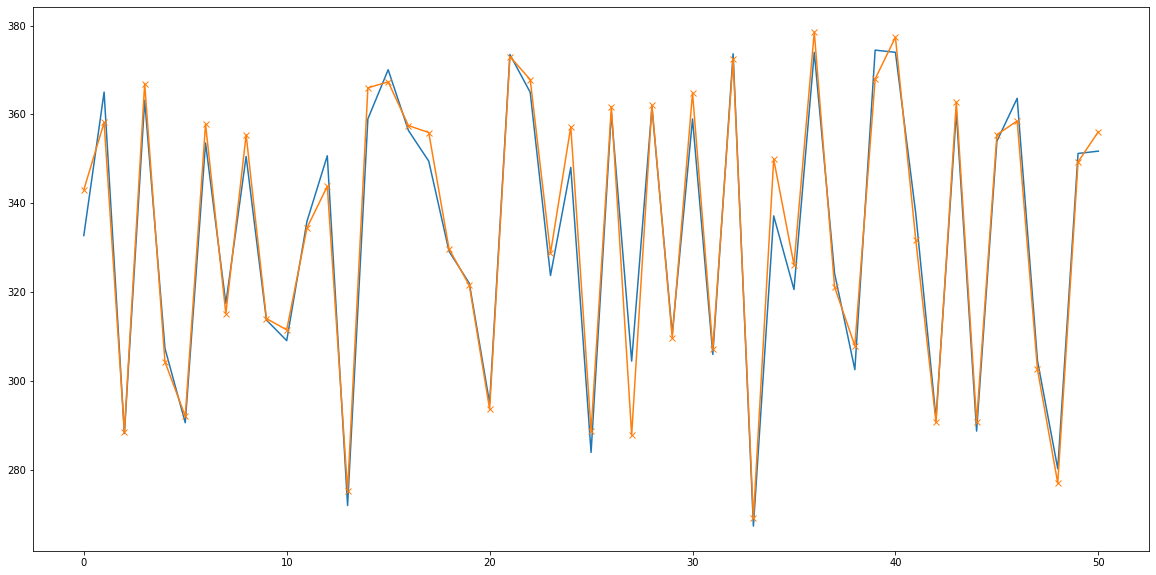

In [10]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

In [11]:
""" Applying Support Vector Regression """
regressor = SVR()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[335.24 332.75]
 [343.34 365.05]
 [325.33 288.19]
 [337.37 363.2 ]
 [328.57 307.35]
 [324.5  290.61]
 [345.34 353.6 ]
 [330.93 317.49]
 [342.9  350.55]
 [329.51 313.74]
 [329.07 309.1 ]
 [334.01 335.98]
 [336.98 350.71]
 [331.88 271.99]
 [340.44 359.  ]
 [338.04 370.07]
 [343.22 356.39]
 [342.79 349.5 ]
 [332.54 329.2 ]
 [330.63 322.  ]
 [327.52 295.  ]
 [338.07 373.5 ]
 [337.13 365.  ]
 [332.35 323.76]
 [345.81 348.09]
 [330.42 283.93]
 [344.69 360.34]
 [323.81 304.49]
 [346.19 361.62]
 [329.13 310.58]
 [339.33 359.  ]
 [329.54 306.  ]
 [336.27 373.68]
 [329.74 267.35]
 [335.74 337.18]
 [332.6  320.6 ]
 [337.17 374.  ]
 [330.4  324.25]
 [328.42 302.56]
 [337.51 374.49]
 [338.14 374.  ]
 [334.1  337.76]
 [328.6  291.56]
 [344.14 360.5 ]
 [323.23 288.73]
 [342.57 354.  ]
 [342.93 363.65]
 [327.13 304.57]
 [329.14 280.26]
 [336.21 351.23]
 [344.49 351.75]]


C:\Users\durve\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 6.759831735232902
R-squared: 0.28821125213090837
Mean squared error: 681.1589338330849


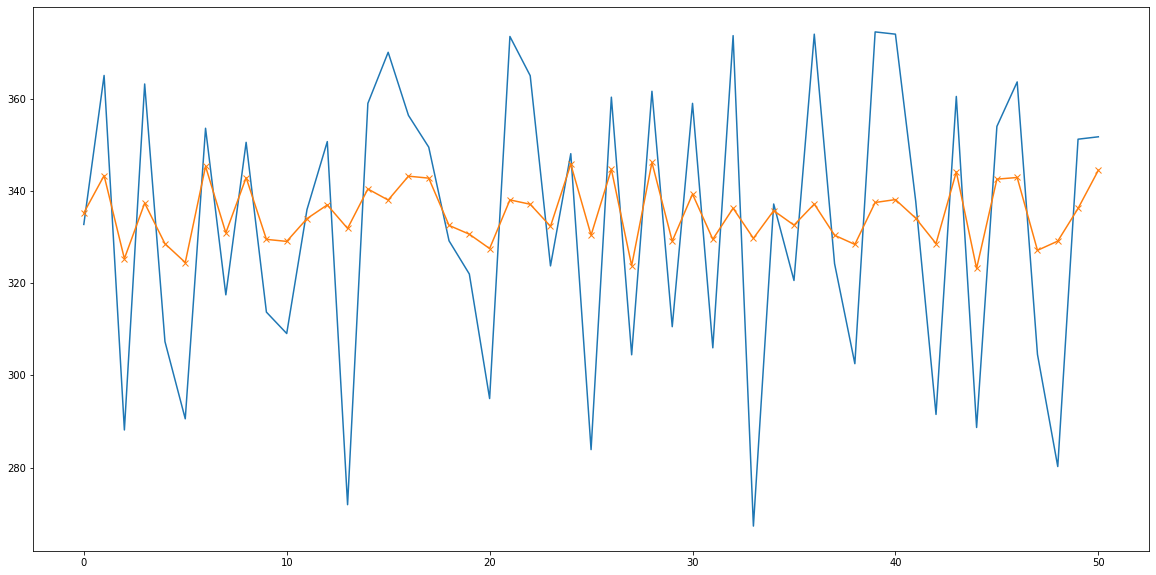

In [13]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

In [14]:
""" Applying OLS Regression """
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)


np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[333.47 332.75]
 [358.11 365.05]
 [288.12 288.19]
 [365.29 363.2 ]
 [305.94 307.35]
 [289.77 290.61]
 [356.61 353.6 ]
 [319.12 317.49]
 [350.41 350.55]
 [313.93 313.74]
 [311.37 309.1 ]
 [335.11 335.98]
 [350.46 350.71]
 [273.21 271.99]
 [362.9  359.  ]
 [369.35 370.07]
 [357.82 356.39]
 [352.16 349.5 ]
 [330.8  329.2 ]
 [323.66 322.  ]
 [293.31 295.  ]
 [370.18 373.5 ]
 [366.93 365.  ]
 [348.79 323.76]
 [350.15 348.09]
 [283.4  283.93]
 [359.46 360.34]
 [287.87 304.49]
 [361.94 361.62]
 [308.64 310.58]
 [360.31 359.  ]
 [307.04 306.  ]
 [374.12 373.68]
 [267.92 267.35]
 [340.8  337.18]
 [323.29 320.6 ]
 [376.81 374.  ]
 [321.66 324.25]
 [308.78 302.56]
 [372.64 374.49]
 [374.94 374.  ]
 [335.95 337.76]
 [290.49 291.56]
 [360.41 360.5 ]
 [290.21 288.73]
 [353.5  354.  ]
 [357.29 363.65]
 [306.69 304.57]
 [283.39 280.26]
 [351.61 351.23]
 [354.75 351.75]]


In [15]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 0.7885921983024864
R-squared: 0.9756847468236911
Mean squared error: 23.26891508054886


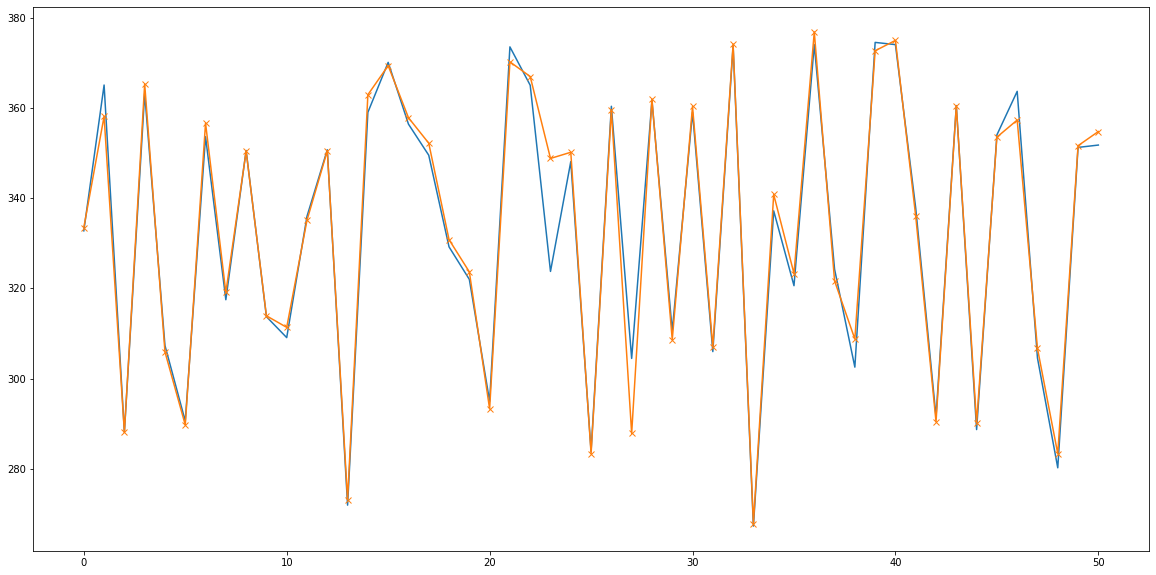

In [16]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

### Part 2 : Effect of Apple TV & Disney Stock Price on Netflix's Open Price

In [17]:
AAPL = DataReader('AAPL',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));
DIS = DataReader('DIS',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));

df = pd.concat([NFLX[['Close']], AAPL[['Close']], DIS[['Close']]], axis=1)

X = df.iloc[:,].values
y = NFLX.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
""" Applying Random Forest """
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[314.04 308.83]
 [363.91 360.34]
 [271.47 259.28]
 [270.42 268.35]
 [311.79 314.39]
 [368.78 370.07]
 [289.45 290.7 ]
 [363.54 355.  ]
 [370.15 377.  ]
 [357.11 343.34]
 [292.93 283.25]
 [297.2  301.61]
 [368.12 359.  ]
 [357.37 356.37]
 [356.12 360.03]
 [356.71 357.  ]
 [323.24 317.49]
 [319.42 334.89]
 [325.54 322.  ]
 [355.46 350.95]
 [267.91 263.61]
 [331.44 343.56]
 [330.89 335.  ]
 [268.47 268.2 ]
 [356.24 364.85]
 [365.03 367.87]
 [289.4  288.1 ]
 [356.31 360.5 ]
 [277.33 271.81]
 [305.7  296.  ]
 [296.84 295.  ]
 [305.46 294.49]
 [288.11 291.56]
 [333.55 337.76]
 [302.4  302.56]
 [290.09 298.78]
 [377.71 378.  ]
 [363.43 361.62]
 [365.71 367.92]
 [284.01 291.  ]
 [355.66 362.26]
 [378.99 378.29]
 [324.29 310.51]
 [277.41 270.68]
 [292.65 291.25]
 [268.3  271.99]
 [356.42 358.01]
 [356.16 351.75]
 [309.54 304.7 ]
 [276.58 272.89]
 [271.44 267.35]]


In [19]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 1.6169856189117089
R-squared: 0.9706865393471285
Mean squared error: 41.079994402184916


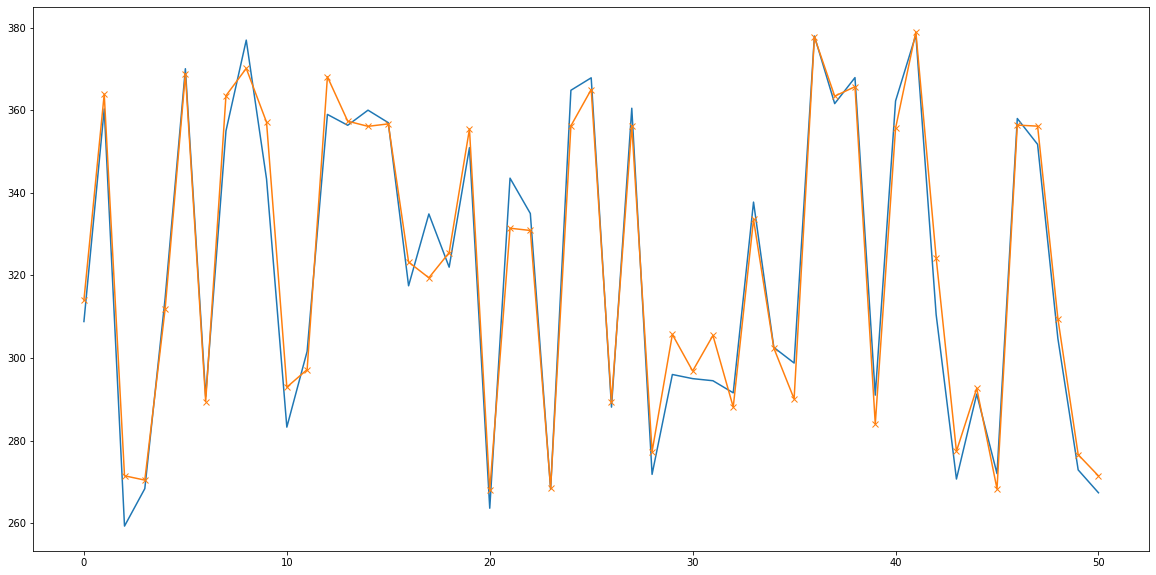

In [20]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

In [21]:
""" Applying Support Vector Regression """
regressor = SVR()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[335.2  308.83]
 [335.89 360.34]
 [335.54 259.28]
 [335.4  268.35]
 [335.43 314.39]
 [335.72 370.07]
 [335.44 290.7 ]
 [335.55 355.  ]
 [335.55 377.  ]
 [335.8  343.34]
 [335.54 283.25]
 [334.71 301.61]
 [335.6  359.  ]
 [335.59 356.37]
 [335.96 360.03]
 [335.66 357.  ]
 [335.54 317.49]
 [334.93 334.89]
 [335.37 322.  ]
 [335.65 350.95]
 [335.31 263.61]
 [335.54 343.56]
 [335.54 335.  ]
 [335.53 268.2 ]
 [335.98 364.85]
 [336.15 367.87]
 [335.01 288.1 ]
 [335.6  360.5 ]
 [334.82 271.81]
 [333.93 296.  ]
 [335.52 295.  ]
 [334.76 294.49]
 [335.54 291.56]
 [334.68 337.76]
 [335.54 302.56]
 [335.52 298.78]
 [336.3  378.  ]
 [335.55 361.62]
 [335.59 367.92]
 [335.54 291.  ]
 [336.09 362.26]
 [336.66 378.29]
 [335.15 310.51]
 [335.54 270.68]
 [335.53 291.25]
 [335.54 271.99]
 [335.54 358.01]
 [336.   351.75]
 [335.54 304.7 ]
 [335.54 272.89]
 [334.87 267.35]]


C:\Users\durve\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 11.483527802355834
R-squared: -0.12333057130978808
Mean squared error: 1574.2397026292033


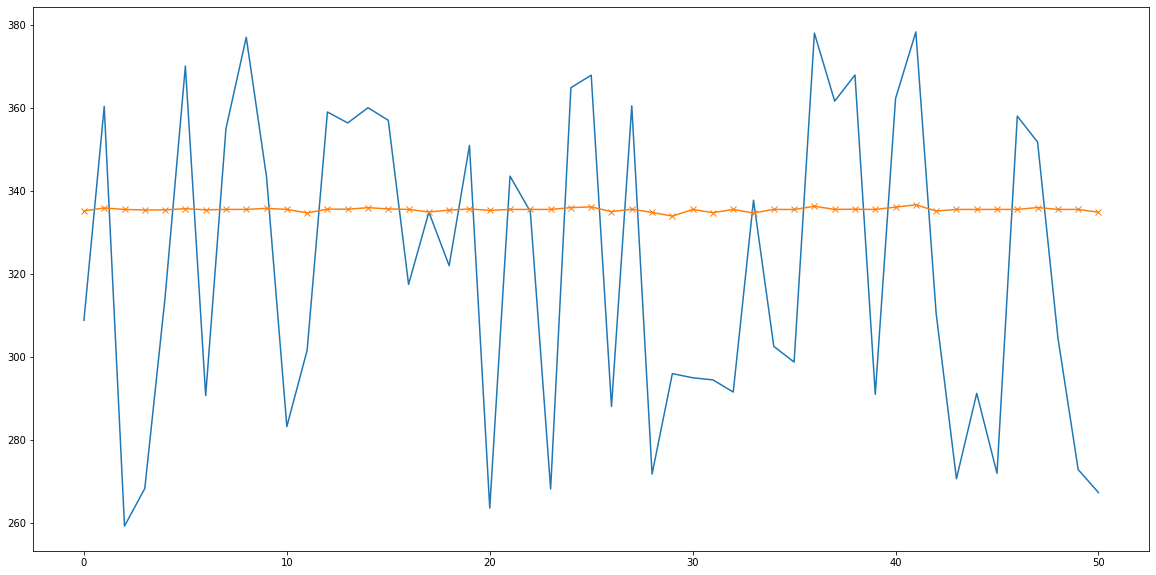

In [23]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

In [24]:
""" Applying OLS Regression """
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)


np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[315.9  308.83]
 [361.97 360.34]
 [267.95 259.28]
 [266.74 268.35]
 [310.53 314.39]
 [366.32 370.07]
 [289.33 290.7 ]
 [359.95 355.  ]
 [369.98 377.  ]
 [355.05 343.34]
 [290.27 283.25]
 [298.45 301.61]
 [365.34 359.  ]
 [359.37 356.37]
 [355.98 360.03]
 [351.03 357.  ]
 [319.69 317.49]
 [324.74 334.89]
 [322.97 322.  ]
 [354.37 350.95]
 [268.59 263.61]
 [337.14 343.56]
 [336.49 335.  ]
 [273.21 268.2 ]
 [358.82 364.85]
 [358.38 367.87]
 [289.58 288.1 ]
 [357.59 360.5 ]
 [271.64 271.81]
 [302.97 296.  ]
 [297.64 295.  ]
 [299.32 294.49]
 [287.11 291.56]
 [332.53 337.76]
 [305.01 302.56]
 [294.63 298.78]
 [378.38 378.  ]
 [360.85 361.62]
 [364.09 367.92]
 [287.19 291.  ]
 [356.24 362.26]
 [380.49 378.29]
 [318.71 310.51]
 [276.87 270.68]
 [292.46 291.25]
 [274.89 271.99]
 [359.8  358.01]
 [357.81 351.75]
 [307.61 304.7 ]
 [278.14 272.89]
 [270.04 267.35]]


In [25]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 1.3583380030217738
R-squared: 0.9817762352150947
Mean squared error: 25.5388527549137


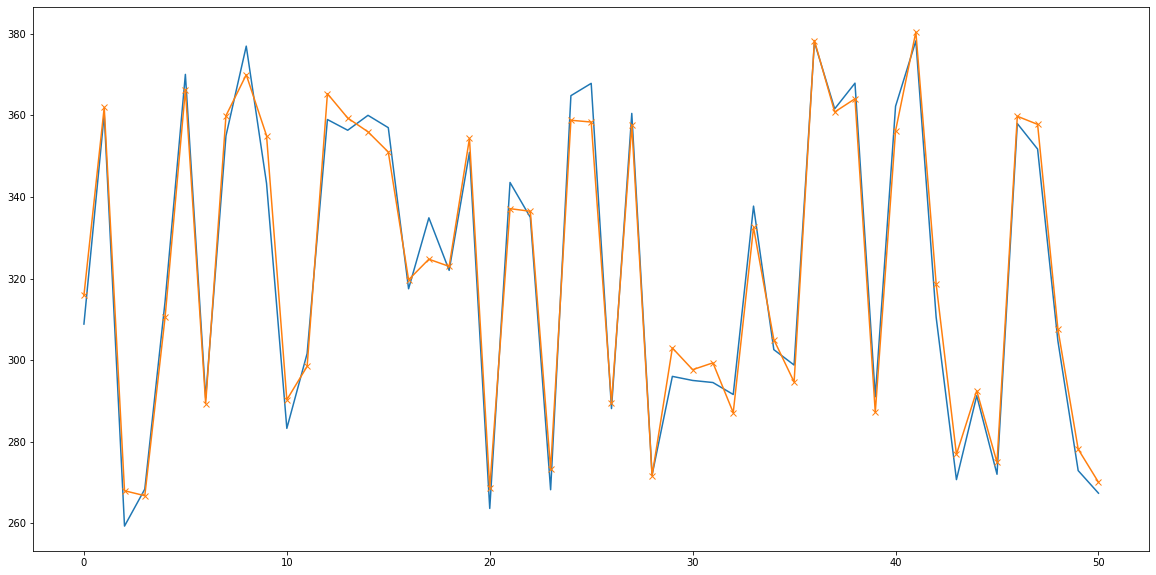

In [26]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

## Part 3: Using Netflix Stock's Internal Predictors

In [27]:
df = NFLX[['High','Low','Close','Open']]


X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
""" Applying Random Forest """
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[369.22 370.07]
 [304.11 296.  ]
 [314.87 313.93]
 [293.6  294.23]
 [334.35 332.75]
 [353.28 350.55]
 [320.56 318.86]
 [364.29 363.5 ]
 [355.35 357.16]
 [308.77 302.1 ]
 [353.6  355.  ]
 [308.85 305.46]
 [289.7  291.56]
 [351.19 351.23]
 [263.43 270.02]
 [364.56 359.  ]
 [347.81 348.71]
 [268.11 270.2 ]
 [295.51 295.67]
 [290.7  284.34]
 [377.26 378.  ]
 [309.45 306.  ]
 [315.43 309.77]
 [337.56 341.63]
 [269.37 268.2 ]
 [364.09 360.54]
 [298.79 301.61]
 [318.25 314.57]
 [367.63 363.2 ]
 [377.74 381.07]
 [358.68 361.72]
 [380.5  375.45]
 [303.95 302.56]
 [366.15 365.  ]
 [316.6  323.4 ]
 [264.7  255.71]
 [267.25 267.35]
 [288.84 291.25]
 [308.85 310.58]
 [302.76 305.27]
 [311.03 310.96]
 [351.87 354.49]
 [329.18 324.5 ]
 [333.34 335.  ]
 [295.51 294.49]
 [346.31 338.  ]
 [334.95 337.76]
 [334.52 334.01]
 [265.82 266.42]
 [358.51 357.39]
 [364.46 367.87]]


In [29]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 0.9098288328366511
R-squared: 0.9882311636868366
Mean squared error: 13.652479867115439


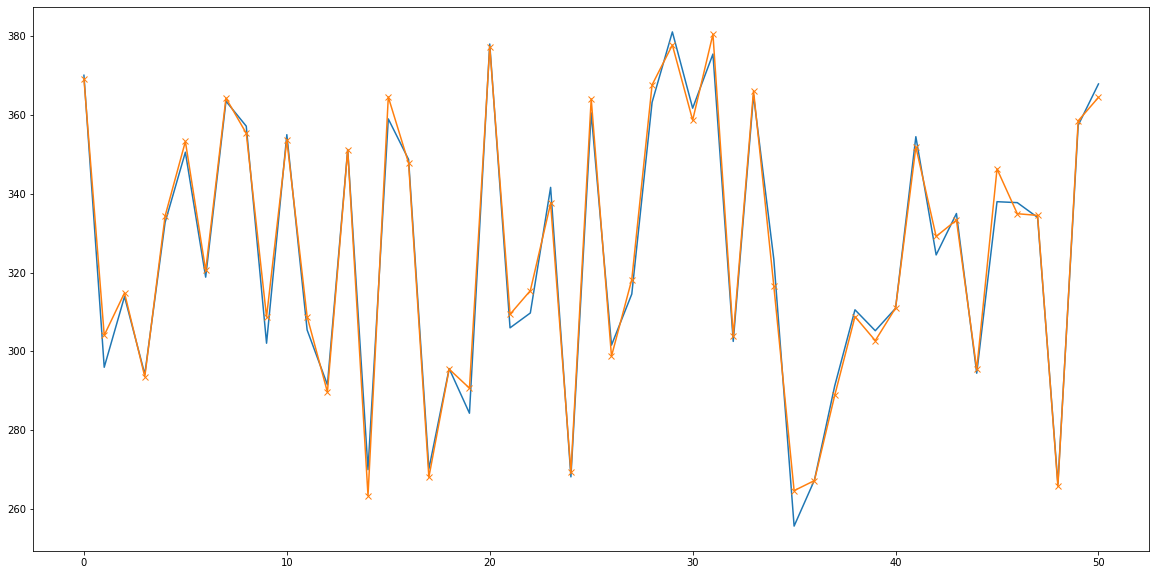

In [30]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

In [31]:
""" Applying Support Vector Regression """
regressor = SVR()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[336.94 370.07]
 [336.45 296.  ]
 [335.94 313.93]
 [334.73 294.23]
 [336.46 332.75]
 [336.7  350.55]
 [336.47 318.86]
 [337.48 363.5 ]
 [337.7  357.16]
 [336.46 302.1 ]
 [337.49 355.  ]
 [335.65 305.46]
 [336.23 291.56]
 [336.97 351.23]
 [336.33 270.02]
 [336.85 359.  ]
 [336.65 348.71]
 [336.41 270.2 ]
 [336.01 295.67]
 [336.12 284.34]
 [336.76 378.  ]
 [335.78 306.  ]
 [336.41 309.77]
 [336.51 341.63]
 [336.22 268.2 ]
 [337.65 360.54]
 [335.98 301.61]
 [336.47 314.57]
 [336.77 363.2 ]
 [336.62 381.07]
 [336.88 361.72]
 [336.56 375.45]
 [335.85 302.56]
 [336.83 365.  ]
 [336.47 323.4 ]
 [336.47 255.71]
 [336.44 267.35]
 [335.04 291.25]
 [334.88 310.58]
 [335.24 305.27]
 [335.66 310.96]
 [338.32 354.49]
 [336.46 324.5 ]
 [336.33 335.  ]
 [336.03 294.49]
 [336.51 338.  ]
 [336.12 337.76]
 [335.65 334.01]
 [335.62 266.42]
 [337.72 357.39]
 [337.29 367.87]]


C:\Users\durve\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 9.891281640925191
R-squared: -0.10422288977399097
Mean squared error: 1280.9576384868014


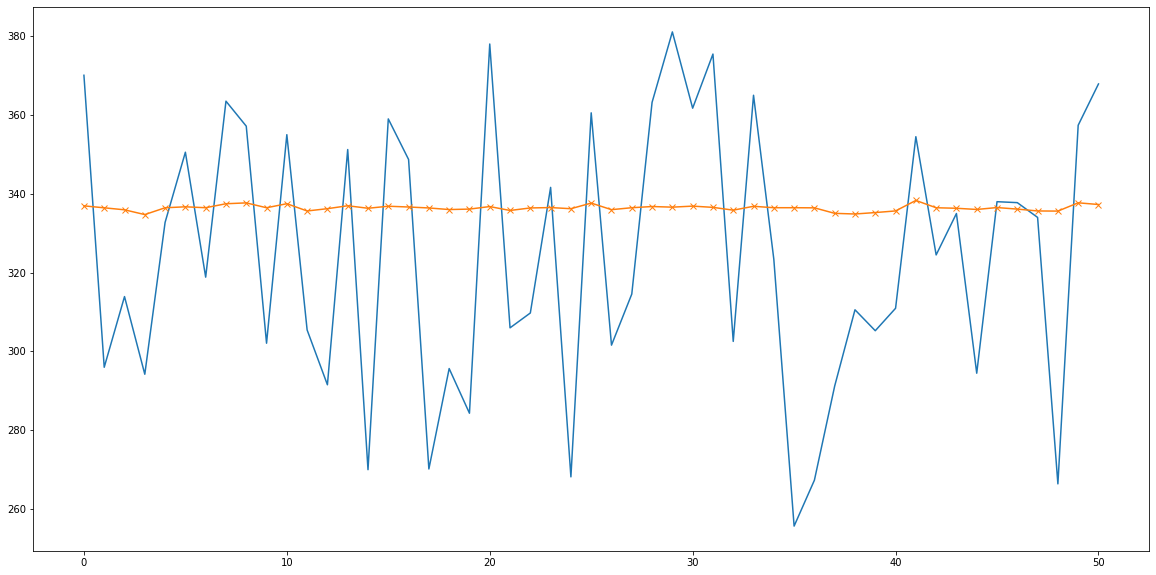

In [33]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

In [34]:
""" Applying OLS Regression """
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)


np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[367.11 370.07]
 [298.03 296.  ]
 [313.69 313.93]
 [293.41 294.23]
 [334.41 332.75]
 [350.63 350.55]
 [320.18 318.86]
 [364.54 363.5 ]
 [355.13 357.16]
 [307.13 302.1 ]
 [353.75 355.  ]
 [306.98 305.46]
 [290.38 291.56]
 [349.26 351.23]
 [268.02 270.02]
 [361.73 359.  ]
 [346.55 348.71]
 [270.37 270.2 ]
 [295.99 295.67]
 [287.11 284.34]
 [379.08 378.  ]
 [306.94 306.  ]
 [312.53 309.77]
 [339.77 341.63]
 [270.45 268.2 ]
 [361.8  360.54]
 [300.53 301.61]
 [316.66 314.57]
 [365.28 363.2 ]
 [379.52 381.07]
 [358.81 361.72]
 [378.84 375.45]
 [299.26 302.56]
 [364.45 365.  ]
 [323.54 323.4 ]
 [258.72 255.71]
 [267.66 267.35]
 [288.2  291.25]
 [307.71 310.58]
 [302.69 305.27]
 [310.16 310.96]
 [351.27 354.49]
 [326.65 324.5 ]
 [332.85 335.  ]
 [295.42 294.49]
 [340.83 338.  ]
 [335.2  337.76]
 [333.39 334.01]
 [264.91 266.42]
 [360.42 357.39]
 [365.39 367.87]]


In [35]:
""" Evaluating the Model Efficiency """

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

print("R-squared:", r2)
print("Mean squared error:", mse)

Mean Absolute Percentage Error: 0.5755431963730389
R-squared: 0.9960803488392798
Mean squared error: 4.547005084775859


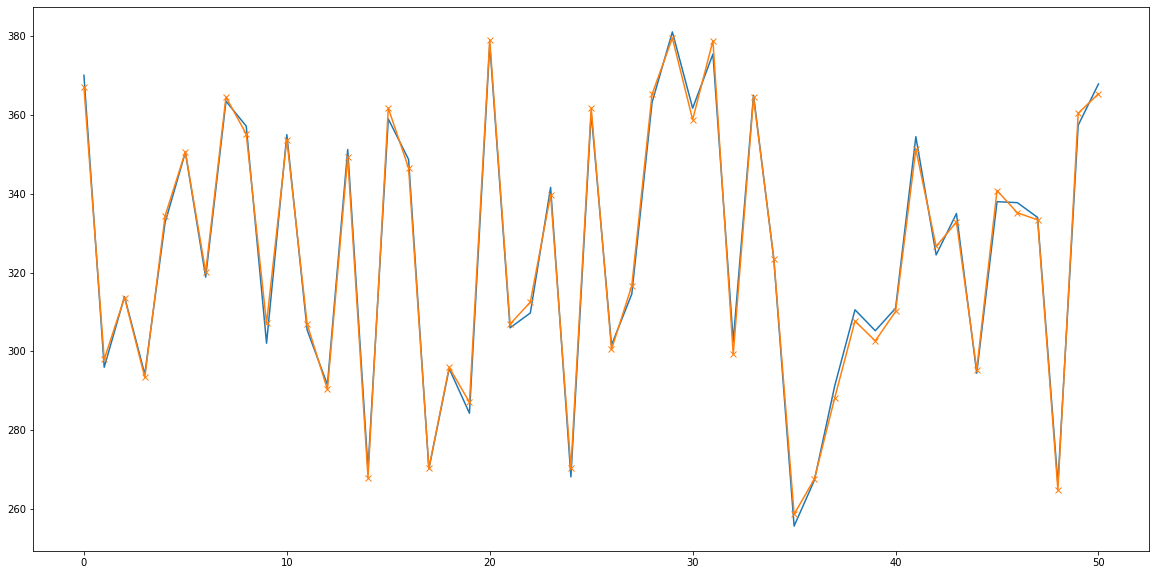

In [36]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred, marker='x')

#### Overall Ordinary Linear Regression performs the best in terms of stock price prediction in all the scenarios